In [1]:
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls

drive  Ktrain  Kval  __MACOSX  sample_data


In [4]:
!unzip "drive/My Drive/Ktrain.zip"
!unzip "drive/My Drive/Kval.zip"

Archive:  drive/My Drive/Ktrain.zip
replace Ktrain/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  drive/My Drive/Kval.zip
replace Kval/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [5]:
train_dir = 'Ktrain'
validation_dir = 'Kval'
test_dir = 'Ktest'

In [6]:
# train_non_ads_dir_sample = os.path.join(base_dir, 'neg')

In [7]:
from keras.preprocessing.image import ImageDataGenerator

In [8]:
# Directory with our training ad pictures
train_ads_dir = os.path.join(train_dir, 'pos')

# Directory with our training dog pictures
train_noads_dir = os.path.join(train_dir, 'neg')

# Directory with our validation ad pictures
validation_ads_dir = os.path.join(validation_dir, 'pos')

# Directory with our validation dog pictures
validation_noads_dir = os.path.join(validation_dir, 'neg')

In [9]:
train_datagen = ImageDataGenerator()
test_gen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'binary', target_size = (224, 224))

validation_generator = test_gen.flow_from_directory( validation_dir, batch_size = 20, class_mode = 'binary', target_size = (224, 224))

Found 359 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [10]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(input_shape=(224, 224,3), include_top=False, weights="imagenet")

In [11]:
for layer in base_model.layers:
    layer.trainable = False

In [12]:
from keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import Dense, Flatten, GlobalAveragePooling2D

base_model = Sequential()
base_model.add(ResNet50(include_top=False, weights='imagenet', pooling='max'))
# base_model.add(Dropout(0.5))
base_model.add(Dense(1, activation='sigmoid'))

In [13]:
import tensorflow as tf
import keras

In [14]:
opt = keras.optimizers.SGD(learning_rate = 0.0001)

In [15]:
from tensorflow.keras.metrics import TruePositives, TrueNegatives, FalseNegatives, FalsePositives,Recall , Precision, BinaryAccuracy

In [16]:
 base_model.compile(optimizer = opt , loss = 'binary_crossentropy', metrics = [
        BinaryAccuracy(),
        TruePositives(),
        TrueNegatives(),
        FalsePositives(),
        FalseNegatives(),
        Precision(),
        Recall()
    ])

In [17]:
resnet_history = base_model.fit(train_generator, validation_data = validation_generator, steps_per_epoch = 100, epochs = 10)

Epoch 1/10
 18/100 [====>.........................] - ETA: 12:47 - loss: 2.1207 - binary_accuracy: 0.6407 - true_positives: 133.0000 - true_negatives: 97.0000 - false_positives: 82.0000 - false_negatives: 47.0000 - precision: 0.6186 - recall: 0.7389

100/100 [==============================] - 192s 2s/step - loss: 2.1207 - binary_accuracy: 0.6407 - true_positives: 133.0000 - true_negatives: 97.0000 - false_positives: 82.0000 - false_negatives: 47.0000 - precision: 0.6186 - recall: 0.7389 - val_loss: 2.6074 - val_binary_accuracy: 0.5083 - val_true_positives: 26.0000 - val_true_negatives: 35.0000 - val_false_positives: 25.0000 - val_false_negatives: 34.0000 - val_precision: 0.5098 - val_recall: 0.4333


In [18]:
base_model.save('resnet_on_second_dataset.h5')

In [19]:
!unzip "drive/My Drive/Ktest.zip"

Archive:  drive/My Drive/Ktest.zip
   creating: Ktest/
  inflating: Ktest/.DS_Store         
  inflating: __MACOSX/Ktest/._.DS_Store  
   creating: Ktest/neg/
   creating: Ktest/pos/
  inflating: Ktest/neg/228.png       
  inflating: Ktest/neg/174.png       
  inflating: Ktest/neg/362.png       
  inflating: Ktest/neg/366.png       
  inflating: Ktest/neg/399.png       
  inflating: Ktest/neg/170.png       
  inflating: Ktest/neg/158.png       
  inflating: Ktest/neg/159.png       
  inflating: Ktest/neg/210.png       
  inflating: Ktest/neg/370.png       
  inflating: Ktest/neg/303.png       
  inflating: Ktest/neg/277.png       
  inflating: Ktest/neg/128.png       
  inflating: Ktest/neg/116.png       
  inflating: Ktest/neg/248.png       
  inflating: Ktest/neg/103.png       
  inflating: Ktest/neg/113.png       
  inflating: Ktest/neg/306.png       
  inflating: Ktest/neg/298.png       
  inflating: Ktest/neg/139.png       
  inflating: Ktest/neg/105.png       
  inflating: Ktest/

In [20]:
from keras.models import load_model

In [21]:
test_generator = test_gen.flow_from_directory( test_dir,  batch_size = 20, class_mode = 'binary', target_size = (224, 224))

Found 120 images belonging to 2 classes.


In [22]:
from PIL import Image

Image.MAX_IMAGE_PIXELS = None

In [23]:
saved_model = load_model("resnet_on_second_dataset.h5")

# Evaluate on test data
scores = saved_model.evaluate(test_generator)
print("%s%s: %.2f%%" % ("evaluate ",saved_model.metrics_names[1], scores[1]*100))

6/6 [==============================] - 15s 2s/step - loss: 2.3786 - binary_accuracy: 0.5167 - true_positives: 25.0000 - true_negatives: 37.0000 - false_positives: 23.0000 - false_negatives: 35.0000 - precision: 0.5208 - recall: 0.4167
evaluate binary_accuracy: 51.67%


        Metric              Value
0       2.378627300262451   loss
1       0.5166666507720947  binary_accuracy
2       25.0                true_positives
3       37.0                true_negatives
4       23.0                false_positives
5       35.0                false_negatives
6       0.5208333134651184  precision
7       0.4166666567325592  recall
[2.378627300262451, 0.5166666507720947, 25.0, 37.0, 23.0, 35.0, 0.5208333134651184, 0.4166666567325592]


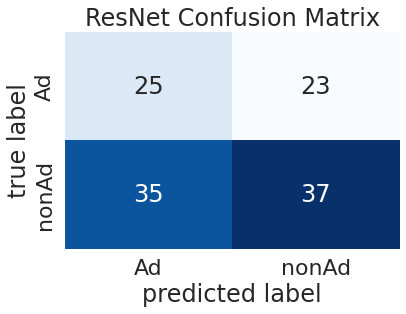

In [24]:
import numpy as np
import seaborn as sns; sns.set_theme()

fmt = '{:<8}{:<20}{}'

print(fmt.format('', 'Metric', 'Value'))
for i, (a, b) in enumerate(zip(scores, saved_model.metrics_names)):
    print(fmt.format(i, a, b))

sns.set(font_scale=2)

def plot_matrix(cm, classes, title):
  ax = sns.heatmap(cm, cmap="Blues", annot=True, xticklabels=classes, yticklabels=classes, cbar=False, fmt='g')
  ax.set(title=title, xlabel="predicted label", ylabel="true label")

print(scores)
    
cm = np.array([[scores[2],scores[4]],[scores[5],scores[3]]])
classes = ['Ad', 'nonAd']
title = "ResNet Confusion Matrix"

plot_matrix(cm, classes, title)

In [25]:
from sklearn.metrics import confusion_matrix

# y_pred = saved_model.predict(test_generator)
y_pred = saved_model.predict(test_generator)

6/6 [==============================] - 15s 2s/step


In [26]:
import numpy as np

In [27]:
y_pred = np.rint(y_pred)
print(confusion_matrix(test_generator.classes, y_pred))

[[33 27]
 [39 21]]


In [28]:
print(test_generator.classes)
print(test_generator.class_indices.keys())

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]
dict_keys(['neg', 'pos'])


In [29]:
from sklearn.metrics import classification_report

print(classification_report(test_generator.classes, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.55      0.50        60
           1       0.44      0.35      0.39        60

    accuracy                           0.45       120
   macro avg       0.45      0.45      0.44       120
weighted avg       0.45      0.45      0.44       120

